##Kaggle Dataset Import

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d team-ai/spam-text-message-classification

  0% 0.00/208k [00:00<?, ?B/s]
100% 208k/208k [00:00<00:00, 54.0MB/s]


In [ ]:
! unzip spam-text-message-classification.zip -d data

Archive:  spam-text-message-classification.zip
  inflating: data/SPAM text message 20170820 - Data.csv  


##Date preperations and Train

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
messageData = pd.read_csv("/content/data/SPAM text message 20170820 - Data.csv")

In [ ]:
messageData.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
print("Data shape:",messageData.shape)
ham_spam_count = messageData.Category.value_counts()
print("Ham- Spam Counts\n",ham_spam_count)
spam_percentage = (ham_spam_count[1]/float(ham_spam_count[0]+ham_spam_count[1]))*100
print("Spam percentage is :",spam_percentage)

Data shape: (5572, 2)
Ham- Spam Counts
 ham     4825
spam     747
Name: Category, dtype: int64
Spam percentage is : 13.406317300789663


In [ ]:
# ham - spam values to (0-1)
messageData["class"]=messageData.Category.map({'ham':0,'spam':1}) 

In [ ]:
print(messageData.head(10))

  Category                                            Message  class
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1


In [ ]:
X = messageData.Message
y = messageData["class"]

In [ ]:
print("Sample of X (message):\n",X.head(5))
print("Sample of y (class)\n",y.head(5))

Sample of X (message):
 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object
Sample of y (class)
 0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64


In [ ]:
print("Shape:",X.shape)
print("Shape:",y.shape)

Shape: (5572,)
Shape: (5572,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1)#train /test split 

In [ ]:
print("Train data shape:",x_train.shape)
print("Train labels shape:",y_train.shape)
print("Test data shape:",x_test.shape)
print("Test labels shape:",y_test.shape)

Train data shape: (4179,)
Train labels shape: (4179,)
Test data shape: (1393,)
Test labels shape: (1393,)


In [ ]:
#Convert a collection of text documents to a matrix of token counts with CountVectorizer
cVectorizer = CountVectorizer(stop_words='english') # get rid of a,an,the .. like stop words #feature extraction ##
cVectorizer.fit(x_train)

CountVectorizer(stop_words='english')

In [ ]:
cVectorizer.vocabulary_

In [ ]:
x_train = cVectorizer.transform(x_train) #feature extraction
x_test = cVectorizer.transform(x_test)  # v

In [ ]:
print("Train data shape:",x_train.shape)
print("Train labels shape:",y_train.shape)
print("Test data shape:",x_test.shape)
print("Test labels shape:",y_test.shape)

Train data shape: (4179, 7201)
Train labels shape: (4179,)
Test data shape: (1393, 7201)
Test labels shape: (1393,)


In [ ]:
from sklearn.feature_selection import SelectKBest,chi2 #feature selection

x_train_new = SelectKBest(chi2,k=7201).fit_transform(x_train,y_train)
x_test_new = SelectKBest(chi2,k=7201).fit_transform(x_test,y_test)

In [ ]:
x_train_new.shape,x_test_new.shape

((4179, 7201), (1393, 7201))

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,f1_score,plot_roc_curve

In [ ]:
#the most accurate classifier is SVC 
classifier = SVC()
classifier.fit(x_train_new,y_train)
y_predict = classifier.predict(x_test_new)
accuracy=accuracy_score(y_test,y_predict)
c_matrix = confusion_matrix(y_test,y_predict)
c_report = classification_report(y_test,y_predict)
f_score = f1_score(y_test,y_predict)

In [ ]:
print("Accuracy:",accuracy)

Accuracy: 0.9820531227566404


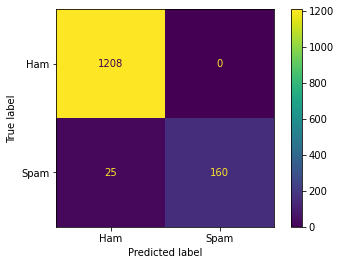

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,display_labels=["Ham","Spam"])
disp.plot()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


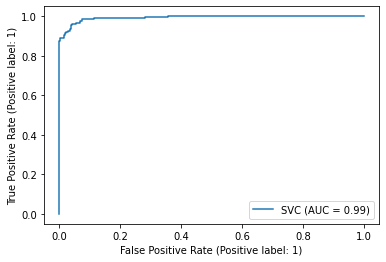

In [ ]:
plot_roc_curve(classifier,x_test,y_test)

In [ ]:
print(c_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       1.00      0.86      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
print(f_score)

0.927536231884058
